Term Frequency - Rotten Tomatoes Reviews

In [ ]:
# STEP 1: Install Required Libraries
# Run this cell ONCE, then follow the instructions below

print("📦 Installing dependencies (this takes ~30 seconds)...")
print("=" * 60)

# Uninstall conflicting packages
!pip uninstall -y numpy pandas scipy

# Install compatible versions together
!pip install -q numpy==1.26.4 pandas==2.2.2 scipy==1.13.1

# Install gensim and nltk
!pip install -q gensim==4.3.3 nltk

print("\n" + "=" * 60)
print("✅ Installation complete!")
print("=" * 60)
print("\n🔄 🔄 🔄 STOP! MANDATORY NEXT STEP 🔄 🔄 🔄")
print("\nYou MUST restart the runtime before continuing:")
print("   1. Click 'Runtime' in the menu bar above")
print("   2. Select 'Restart runtime'")
print("   3. When prompted, click 'Yes' to confirm")
print("   4. Then run the NEXT cell to import libraries")
print("\n⚠️  Do NOT skip this step or you will get errors!")
print("=" * 60)

📦 Installing dependencies (this takes ~30 seconds)...
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.16.2
Uninstalling scipy-1.16.2:
  Successfully uninstalled scipy-1.16.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have num

In [ ]:
# STEP 2: Import Libraries
# Run this cell ONLY AFTER restarting runtime

print("📚 Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("=" * 60)
print("✅ All libraries loaded and ready!")
print("=" * 60)
print(f"NumPy version: {np.__version__}")
print(f"Gensim version: {gensim.__version__}")
print("\n🎉 You're ready to proceed with the assignment!")

📚 Importing libraries...
✅ All libraries loaded and ready!
NumPy version: 1.26.4
Gensim version: 4.3.3

🎉 You're ready to proceed with the assignment!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your CSV cleaned data
df = pd.read_csv('/content/drive/MyDrive/saltburn.csv')  # Replace with your cleaned CSV filename

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")
print(f"\nColumns available: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset contains 280 items

Columns available: ['review-data href', 'audience-reviews__name', 'audience-reviews__name href', 'audience-reviews__duration', 'audience-reviews__review']


Term Frequency *Analysis*

In [ ]:
# Combine all meaningful words from your dataset (like HW1)
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        # Remove non-alphabetic characters and convert to lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
        # Tokenize words
        words = text.split()
        # Remove stop words and lemmatize
        meaningful_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 1]
        return meaningful_words
    return []


# Apply preprocessing to the review column
df['meaningful_words'] = df['audience-reviews__review'].apply(preprocess_text)


all_meaningful_words = []
for word_list in df['meaningful_words']:
    all_meaningful_words.extend(word_list)

# Count word frequencies (same as HW1)
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)  # Get top 20 words

print("🔤 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print(f"\nTop 20 most frequent words:")

for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")

🔤 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 6,805
Unique words found: 2,434

Top 20 most frequent words:
 1. movie           (186 times)
 2. film            (104 times)
 3. character       (61 times)
 4. story           (55 times)
 5. watch           (53 times)
 6. scene           (52 times)
 7. like            (49 times)
 8. good            (48 times)
 9. really          (46 times)
10. plot            (45 times)
11. great           (43 times)
12. time            (40 times)
13. saltburn        (40 times)
14. barry           (39 times)
15. twist           (38 times)
16. one             (37 times)
17. end             (35 times)
18. keoghan         (31 times)
19. dont            (30 times)
20. much            (30 times)


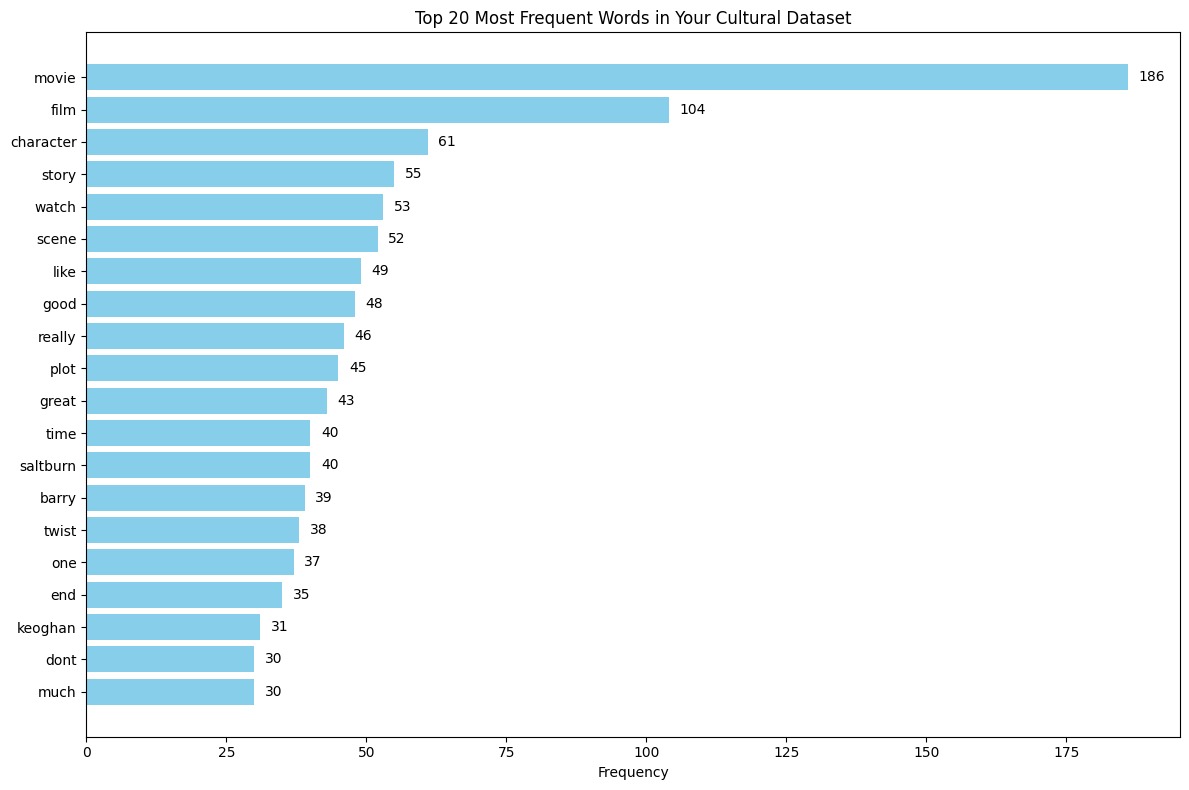

📊 Term frequency visualization complete!


In [ ]:
# Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Your Cultural Dataset')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("📊 Term frequency visualization complete!")

Term Frequency - YouTube Video Comments

In [ ]:
# STEP 1: Install Required Libraries
# Run this cell ONCE, then follow the instructions below

print("📦 Installing dependencies (this takes ~30 seconds)...")
print("=" * 60)

# Uninstall conflicting packages
!pip uninstall -y numpy pandas scipy

# Install compatible versions together
!pip install -q numpy==1.26.4 pandas==2.2.2 scipy==1.13.1

# Install gensim and nltk
!pip install -q gensim==4.3.3 nltk

print("\n" + "=" * 60)
print("✅ Installation complete!")
print("=" * 60)
print("\n🔄 🔄 🔄 STOP! MANDATORY NEXT STEP 🔄 🔄 🔄")
print("\nYou MUST restart the runtime before continuing:")
print("   1. Click 'Runtime' in the menu bar above")
print("   2. Select 'Restart runtime'")
print("   3. When prompted, click 'Yes' to confirm")
print("   4. Then run the NEXT cell to import libraries")
print("\n⚠️  Do NOT skip this step or you will get errors!")
print("=" * 60)

📦 Installing dependencies (this takes ~30 seconds)...
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: scipy 1.16.3
Uninstalling scipy-1.16.3:
  Successfully uninstalled scipy-1.16.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; 

In [ ]:
# STEP 2: Import Libraries
# Run this cell ONLY AFTER restarting runtime

print("📚 Importing libraries...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

import gensim
from gensim import corpora
from gensim.models import LdaModel
from nltk.stem import WordNetLemmatizer

import nltk
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("=" * 60)
print("✅ All libraries loaded and ready!")
print("=" * 60)
print(f"NumPy version: {np.__version__}")
print(f"Gensim version: {gensim.__version__}")
print("\n🎉 You're ready to proceed with the assignment!")

📚 Importing libraries...
✅ All libraries loaded and ready!
NumPy version: 1.26.4
Gensim version: 4.3.3

🎉 You're ready to proceed with the assignment!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load your CSV cleaned data
df = pd.read_csv('/content/drive/MyDrive/youtube.csv')  # Replace with your cleaned CSV filename

print(f"✅ Dataset loaded successfully!")
print(f"Dataset contains {len(df)} items")
print(f"\nColumns available: {df.columns.tolist()}")

✅ Dataset loaded successfully!
Dataset contains 109 items

Columns available: ['style-scope src', 'style-scope', 'yt-simple-endpoint href', 'yt-simple-endpoint', 'yt-simple-endpoint href 3', 'yt-core-attributed-string', 'hidden 2', 'style-scope 3', 'hidden 3', 'yt-core-attributed-string 3', 'yt-core-attributed-string 4', 'style-scope src 3', 'dot']


In [ ]:
from collections import Counter

# Combine and split words from the "yt-core-attributed-string" column
all_meaningful_words = []
for text in df['yt-core-attributed-string']:
    if isinstance(text, str):  # Make sure it's a string
        words = text.split()   # Split into words
        all_meaningful_words.extend(words)

# Count word frequencies
word_frequency = Counter(all_meaningful_words)
top_words = word_frequency.most_common(20)

# Print results
print("🧠 TERM FREQUENCY ANALYSIS RESULTS")
print("=" * 40)
print(f"Total words analyzed: {len(all_meaningful_words):,}")
print(f"Unique words found: {len(word_frequency):,}")
print("\nTop 20 most frequent words:")
for i, (word, count) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:<15} ({count:,} times)")


🧠 TERM FREQUENCY ANALYSIS RESULTS
Total words analyzed: 4,722
Unique words found: 1,731

Top 20 most frequent words:
 1. the             (203 times)
 2. to              (126 times)
 3. he              (101 times)
 4. a               (96 times)
 5. and             (90 times)
 6. of              (85 times)
 7. was             (79 times)
 8. is              (78 times)
 9. in              (64 times)
10. I               (63 times)
11. that            (58 times)
12. his             (48 times)
13. for             (45 times)
14. as              (38 times)
15. it              (38 times)
16. him             (35 times)
17. not             (34 times)
18. think           (32 times)
19. Oliver          (31 times)
20. Felix           (31 times)


In [ ]:
print(df.columns)

Index(['style-scope src', 'style-scope', 'yt-simple-endpoint href',
       'yt-simple-endpoint', 'yt-simple-endpoint href 3',
       'yt-core-attributed-string', 'hidden 2', 'style-scope 3', 'hidden 3',
       'yt-core-attributed-string 3', 'yt-core-attributed-string 4',
       'style-scope src 3', 'dot'],
      dtype='object')


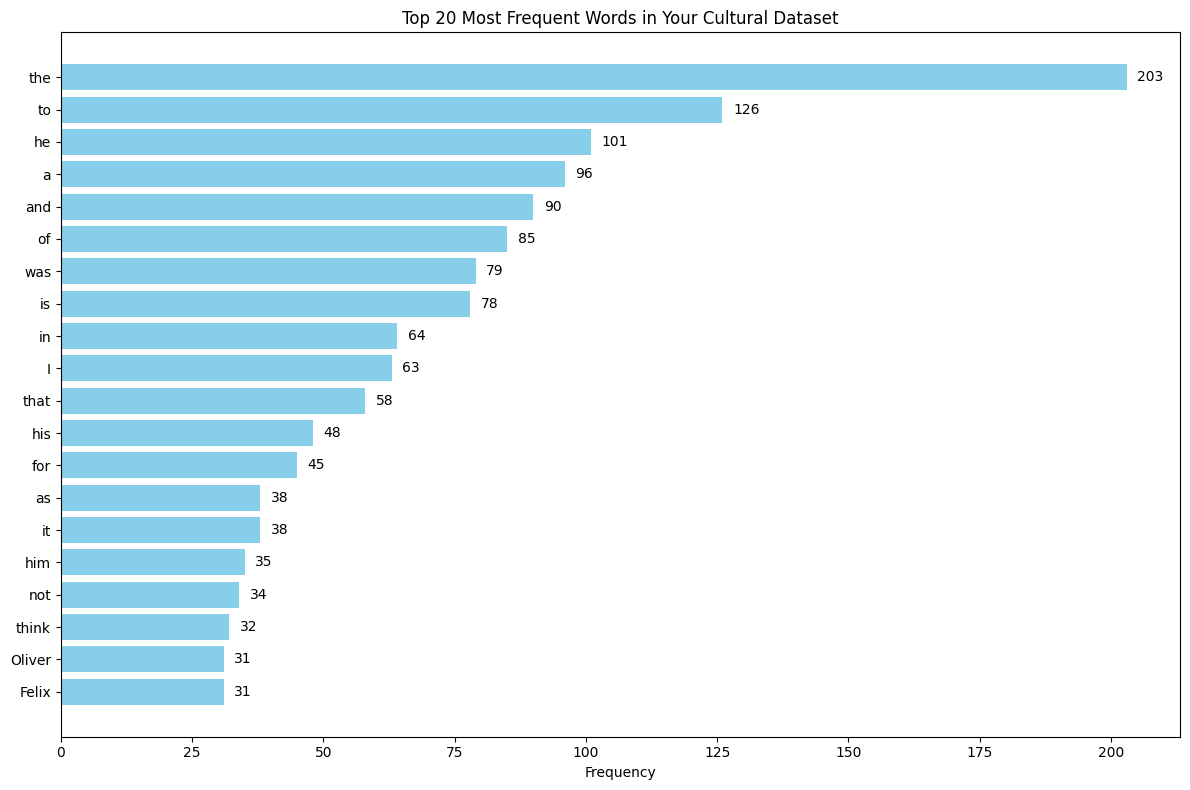

📊 Term frequency visualization complete!


In [ ]:
# Create visualization of top words
words = [word for word, count in top_words]
counts = [count for word, count in top_words]

plt.figure(figsize=(12, 8))
plt.barh(range(len(words)), counts, color='skyblue')
plt.yticks(range(len(words)), words)
plt.xlabel('Frequency')
plt.title(f'Top {len(words)} Most Frequent Words in Your Cultural Dataset')
plt.gca().invert_yaxis()  # Put highest frequency at top

# Add count labels on bars
for i, count in enumerate(counts):
    plt.text(count + max(counts)*0.01, i, str(count), va='center')

plt.tight_layout()
plt.show()

print("📊 Term frequency visualization complete!")